# Ratings prediction

# There is a client website where people write different reviews for technical products. Now they are adding a new feature to their website i.e the reviewer will have to add ratings along with reviews. The rating is having 5 options available 1 stars, 2 stars, 3 stars, 4 stars and 5 stars. Now they want to predict ratings for the reviews which were written in the past.

# This is a classification problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
import selenium
from selenium import webdriver
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Extracted data from flipkart to be stored in dataframe df3

In [2]:
df3=pd.read_csv('flipkart data.csv')

In [3]:
df3.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df3

ratings                                            reviews
0           5  Best for this price range but camera is ok per...
1           5  Good budget phone. Best battery and best perfo...
2           5  Nice entry level smartphone.. too good for fam...
3           4  Phone is good but camera quality is not so goo...
4           5  Very nice mobile in this price\nBattery perfor...
...       ...                                                ...
8925        5  Mobile is really worth for money, design also ...
8926        5  This is amazing product it works properly and ...
8927        5  Wow amazing product this price and value for m...
8928        5  Superb product\n>>Camera performance is too go...
8929        4  Wonderful\nVery good looking phone but it's sl...

[8930 rows x 2 columns]

# Extracted data from flipkart to be stored in dataframe df4

In [5]:
df4=pd.read_csv('Amazon data.csv')

In [6]:
df4.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
df4

reviews  ratings
0      It has great sound quality and bass but after ...        1
1      [BIG UPDATE]\nIT BROKE ALONG THE RIGHT HINGE, ...        2
2      This is a premium quality product from boAt-Li...        5
3      The boAt Rockerz line is boAt's super cheap li...        1
4      These are super comfortable and premium lookin...        5
...                                                  ...      ...
24995                     Vouce quality is not that good        5
24996  Sound quality is too good, bass is working goo...        4
24997  Good headphones by infinity (jbl)\nSound quali...        4
24998  Cannot use continue due to ear's pain and soun...        5
24999  Very neat sound. Battery backup is excellent. ...        1

[25000 rows x 2 columns]

# Appending the data from dataframe df3 into df4


In [8]:
df5=df4.append(df3)

In [9]:
df5

reviews  ratings
0     It has great sound quality and bass but after ...        1
1     [BIG UPDATE]\nIT BROKE ALONG THE RIGHT HINGE, ...        2
2     This is a premium quality product from boAt-Li...        5
3     The boAt Rockerz line is boAt's super cheap li...        1
4     These are super comfortable and premium lookin...        5
...                                                 ...      ...
8925  Mobile is really worth for money, design also ...        5
8926  This is amazing product it works properly and ...        5
8927  Wow amazing product this price and value for m...        5
8928  Superb product\n>>Camera performance is too go...        5
8929  Wonderful\nVery good looking phone but it's sl...        4

[33930 rows x 2 columns]

In [10]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33930 entries, 0 to 8929
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  33840 non-null  object
 1   ratings  33930 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 795.2+ KB


There are in total 33930 records and 2 features named as reviews and ratings.

The feature named as reviews is having object datatype and ratings is having integer datatype.

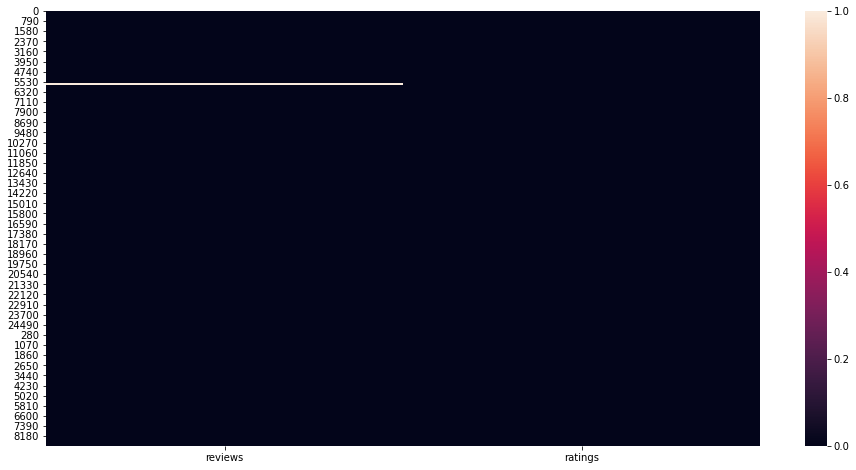

In [11]:
plt.figure(figsize=[16,8])
sns.heatmap(df5.isnull())
plt.show()

In [12]:
df5.isnull().sum()

reviews    90
ratings     0
dtype: int64

From the heatmap it can be said there are null values present in the feature named as reviews.

In [13]:
df7=df5.copy()

In [14]:
df7.dropna(inplace=True)

In [15]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33840 entries, 0 to 8929
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  33840 non-null  object
 1   ratings  33840 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 793.1+ KB


In [16]:
df7.isnull().sum()

reviews    0
ratings    0
dtype: int64

The null values present in the feature named as reviews are eliminated.

In [17]:
df7['ratings'].value_counts()

5    17164
4     6556
1     5313
3     3031
2     1776
Name: ratings, dtype: int64

The maximum records i.e 17164 are for ratings 5 and the minimum records i.e 1776 are for ratings 2.

In [18]:
df7['length']=df7['reviews'].str.len()

In [19]:
df7

reviews  ratings  length
0     It has great sound quality and bass but after ...        1     431
1     [BIG UPDATE]\nIT BROKE ALONG THE RIGHT HINGE, ...        2    1775
2     This is a premium quality product from boAt-Li...        5     533
3     The boAt Rockerz line is boAt's super cheap li...        1    3148
4     These are super comfortable and premium lookin...        5     472
...                                                 ...      ...     ...
8925  Mobile is really worth for money, design also ...        5     338
8926  This is amazing product it works properly and ...        5      83
8927  Wow amazing product this price and value for m...        5     134
8928  Superb product\n>>Camera performance is too go...        5     496
8929  Wonderful\nVery good looking phone but it's sl...        4     411

[33840 rows x 3 columns]

In [20]:
df7['reviews'].str.len().sum()

5630544

The summation of the length for the feature named as reviews is 5630544.

Removing stopwords, punctutations from the feature named as reviews.

In [21]:
#Remove whitespace between terms with a single space from the reviews feature.
df7['reviews']=df7['reviews'].str.replace(r',\s+',' ') # using regex to replace white space terms.

In [22]:
# Remove punctuation from the reviews feature
df7['reviews']=df7['reviews'].str.replace(r'[^\w\d\s]',' ')

In [23]:
# Remove trailing and leading whitespace from the reviews feature
df7['reviews']=df7['reviews'].str.replace(r'^\s+|\s+?$','')

In [24]:
# Removing numbers from the reviews feature.
df7['reviews']=df7['reviews'].str.replace(r'[0-9]+'," ")

In [25]:
import nltk

In [26]:
from nltk.corpus import stopwords

In [27]:
stp=stopwords.words('english')

As stopwords are the most frequent words that appears in raw documents it doesn't mean that the word is important. Further, the stopwords are removed from reviews feature.

In [28]:
df7['reviews']=df7['reviews'].str.lower()

In [29]:
df7['reviews']=df7['reviews'].apply(lambda x: " ".join(term for term in x.split() if term not in stp))

In [30]:
df7['clean length']=df7['reviews'].str.len()

In [31]:
df7

reviews  ratings  length  \
0     great sound quality bass months use got break ...        1     431   
1     big update broke along right hinge wearing nor...        2    1775   
2     premium quality product boat lifestyle profess...        5     533   
3     boat rockerz line boat super cheap lineup budg...        1    3148   
4     super comfortable premium looking headphones b...        5     472   
...                                                 ...      ...     ...   
8925  mobile really worth money design also good pri...        5     338   
8926  amazing product works properly display also go...        5      83   
8927  wow amazing product price value money display ...        5     134   
8928  superb product camera performance good price e...        5     496   
8929  wonderful good looking phone slow ya slow good...        4     411   

      clean length  
0              252  
1             1007  
2              373  
3             1894  
4              322  
...            ...  
8925           257  
8926            58  
8927           101  
8928           363  
8929           287  

[33840 rows x 4 columns]

In [32]:
df7['clean length'].sum()

3747863

After applying regex  and removing of stopwords from the reviews feature the length of clean data is 3747863 and the length of uncleaned data as per above is 5630544. 

# Visulizations techniques on the words that appears no of times.

In [33]:
from wordcloud import WordCloud

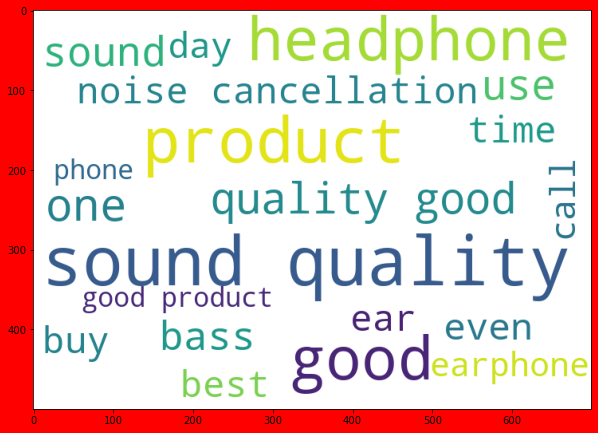

In [34]:
# if any word is occuring more no of times it will be highlighted in bigger text
spams=df7[df7['ratings']==1]['reviews']
spam_cloud=WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))
plt.figure(figsize=[10,8],facecolor='r')
plt.imshow(spam_cloud)

The word such as sound quality having ratings 1 are repeated most. Further it can be said that the sound quality of the product might not be that great that's why rating is given as 1.

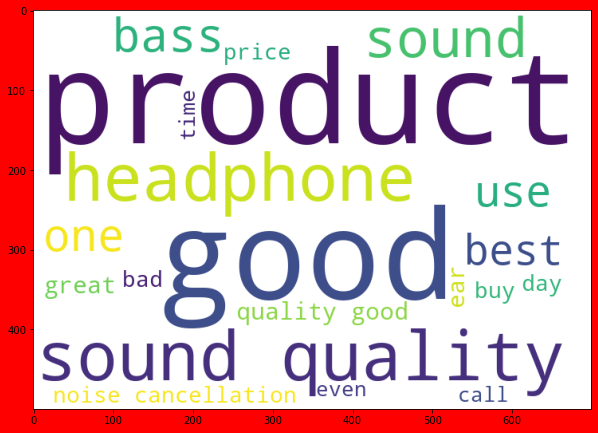

In [35]:
# if any word is occuring more no of times it will be highlighted in bigger text
spams=df7[df7['ratings']==2]['reviews']
spam_cloud=WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))
plt.figure(figsize=[10,8],facecolor='r')
plt.imshow(spam_cloud)

The words such as sound quality,product having ratings 2 are repeated most. Further it can be said that the sound quality as well as the overall quality of product might not be that much appealing that's why rating is given as 2.

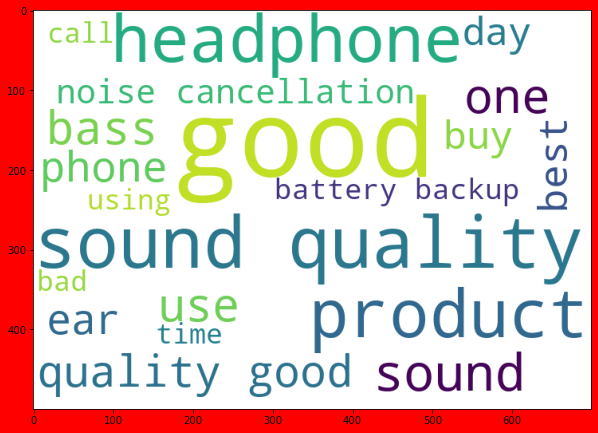

In [36]:
# if any word is occuring more no of times it will be highlighted in bigger text
spams=df7[df7['ratings']==3]['reviews']
spam_cloud=WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))
plt.figure(figsize=[10,8],facecolor='r')
plt.imshow(spam_cloud)

he word such as good having ratings 3 is repeated most. Further, it can be said the overall quality of the product is good that's why rating is given as 3.

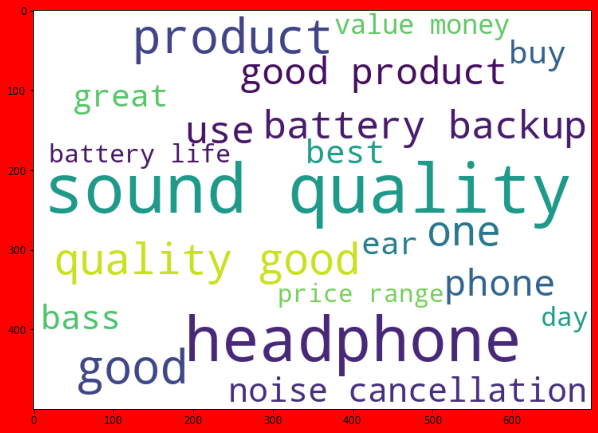

In [37]:
# if any word is occuring more no of times it will be highlighted in bigger text
spams=df7[df7['ratings']==4]['reviews']
spam_cloud=WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))
plt.figure(figsize=[10,8],facecolor='r')
plt.imshow(spam_cloud)

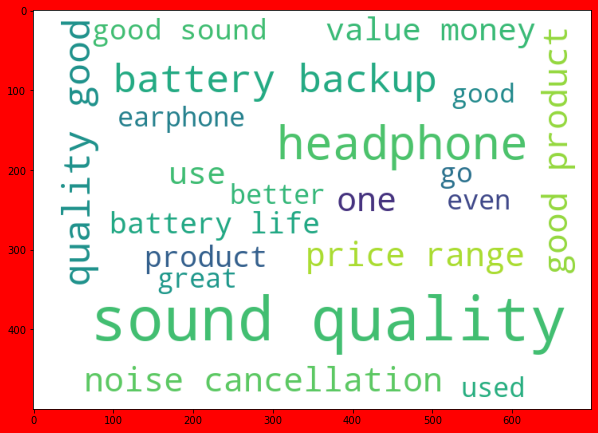

In [38]:
# if any word is occuring more no of times it will be highlighted in bigger text
spams=df7[df7['ratings']==5]['reviews']
spam_cloud=WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))
plt.figure(figsize=[10,8],facecolor='r')
plt.imshow(spam_cloud)

The words such as great, value for money, good sound, battery life, battery backup having ratings 5 are repeated the most.Further, it can be said the overall quality of a product is great i.e in terms of sound quality, battery life, battery backup that's why rating is given as 5.

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [40]:
tf_vec=TfidfVectorizer()
naive=MultinomialNB()
features=tf_vec.fit_transform(df7['reviews'])
X=features
X

<33840x17015 sparse matrix of type '<class 'numpy.float64'>'
	with 494835 stored elements in Compressed Sparse Row format>

# Splitting data and Training the model 

In [41]:
y=df7['ratings']

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [43]:
mn=MultinomialNB()
mn.fit(X_train,y_train)
pred=mn.predict(X_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

0.5116725768321513
[[  12    0    2    3 1058]
 [   3    0    0    1  316]
 [   5    1    0    2  620]
 [   6    0    0   22 1261]
 [  19    2    3    3 3429]]


In [44]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
pred1=dtc.predict(X_test)
print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))

0.45271867612293143
[[ 238   48   75  187  527]
 [  62   24   17   51  166]
 [  92   20   87  117  312]
 [ 156   40   68  361  664]
 [ 414  110  175  403 2354]]


In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
pred2=knn.predict(X_test)
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))

In [ ]:
svc=SVC()
svc.fit(X_train,y_train)
pred3=svc.predict(X_test)
print(accuracy_score(y_test,pred3))
print(confusion_matrix(y_test,pred3))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
pred4=rfc.predict(X_test)
print(accuracy_score(y_test,pred4))
print(confusion_matrix(y_test,pred4))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)
pred5=ada.predict(X_test)
print(accuracy_score(y_test,pred5))
print(confusion_matrix(y_test,pred5))

In [ ]:
gr=GradientBoostingClassifier()
gr.fit(X_train,y_train)
pred6=gr.predict(X_test)
print(accuracy_score(y_test,pred6))
print(confusion_matrix(y_test,pred6))

# Calculating cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(mn,X,y,cv=5)
print(score.mean())

In [ ]:
score1=cross_val_score(dtc,X,y,cv=5)
print(score1.mean())

In [ ]:
score2=cross_val_score(knn,X,y,cv=5)
print(score2.mean())

In [ ]:
score3=cross_val_score(svc,X,y,cv=5)
print(score3.mean())

In [ ]:
score4=cross_val_score(rfc,X,y,cv=5)
print(score4.mean())

In [ ]:
score5=cross_val_score(ada,X,y,cv=5)
print(score5.mean())

In [ ]:
score6=cross_val_score(gr,X,y,cv=5)
print(score6.mean())

# The difference between accuracy score and cross_val_Score is minimum for AdaboostClassifier and Multinomial Naive bayes. Hypertuning is required to find the best model.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params={'alpha':[0.1,0.001,0.0001,1]}

In [ ]:
re=RandomizedSearchCV(mn,param_distributions=params,n_jobs=-1,cv=5)
re.fit(X_train,y_train)
re.best_params_

In [ ]:
mn=MultinomialNB(alpha=0.1)
mn.fit(X_train,y_train)
pred7=mn.predict(X_test)
print(accuracy_score(y_test,pred7))
print(confusion_matrix(y_test,pred7))

In [ ]:
params={'n_estimators':[10,20,30,40,50],'learning_rate':[1,0.1,.01,.001,.0001]}

In [ ]:
re=RandomizedSearchCV(ada,param_distributions=params,n_jobs=-1,cv=5)
re.fit(X_train,y_train)
re.best_params_

In [ ]:
ada=AdaBoostClassifier(n_estimators=10,learning_rate=0.001)
ada.fit(X_train,y_train)
pred8=ada.predict(X_test)
print(accuracy_score(y_test,pred8))
print(confusion_matrix(y_test,pred8))
print(classification_report(y_test,pred8))

# Based on hyper tuning of parameters AdaBoost classifier is my best model with accuracy score of 51%